## Advanced tuning of parameters

In this tutorial, we will apply the skills from previous tutorials and build a classifier using the `Pipelines` and `FeatureUnion` functions from sklearn.

In [33]:
# IMPORT PACKAGES
import pandas as pd

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt

### Data

We will be building a binary classifier that predicts wheter a person has diabetes or not, using information on the patient's health. 

The data can be found [here](https://drive.google.com/file/d/1TvCKlmH3Z32XAKk-VUcZyYu95Ccyw3PO/view?usp=sharing). 


In [5]:
col_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [7]:
data = pd.read_csv('pima-indians-diabetes.csv', sep=';')
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
data.shape

(768, 9)

In [12]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [18]:
for item in [X_train, X_test, y_train, y_test]:
    print(item.shape)

(614, 8)
(154, 8)
(614,)
(154,)


### Task

Build classifier which predicts the target variable `class` using rest of the attributes. The model should be fitted using pipeline that contains:
- PCA method
- SelectKBest method
- FeatureUnion
- Random Forest

Choose the best set of parameters using `Pipeline` and grid_search.

> #### Note
> **In this exercise, we are focusing on the implementation of pipeline. Since we have only 9 columns in our dataset the PCA is probably not the best technique to use during the data preparation from a methodology point of view.**

In [25]:
# PCA:
pca = PCA()

# Select K Best
selection = SelectKBest()

In [26]:
combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

In [27]:
# initialize the classifier
rf = RandomForestClassifier()

In [36]:
# create our pipeline from FeatureUnion 
pipeline = Pipeline([("features", combined_features), ("rf", rf)])

# set up our parameters grid
param_grid = {"features__pca__n_components": [2, 3, 4],
                  "features__univ_select__k": [2, 3, 4],
                  "rf__n_estimators":[100, 150, 200],
                  "rf__max_depth": [4, 5, 6]}

# create a Grid Search object
grid_search = GridSearchCV(pipeline, param_grid, verbose=10, refit=True)    

# fit the model and tune parameters
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5; 1/81] START features__pca__n_components=2, features__univ_select__k=2, rf__max_depth=4, rf__n_estimators=100
[CV 1/5; 1/81] END features__pca__n_components=2, features__univ_select__k=2, rf__max_depth=4, rf__n_estimators=100;, score=0.764 total time=   0.0s
[CV 2/5; 1/81] START features__pca__n_components=2, features__univ_select__k=2, rf__max_depth=4, rf__n_estimators=100
[CV 2/5; 1/81] END features__pca__n_components=2, features__univ_select__k=2, rf__max_depth=4, rf__n_estimators=100;, score=0.764 total time=   0.0s
[CV 3/5; 1/81] START features__pca__n_components=2, features__univ_select__k=2, rf__max_depth=4, rf__n_estimators=100
[CV 3/5; 1/81] END features__pca__n_components=2, features__univ_select__k=2, rf__max_depth=4, rf__n_estimators=100;, score=0.805 total time=   0.0s
[CV 4/5; 1/81] START features__pca__n_components=2, features__univ_select__k=2, rf__max_depth=4, rf__n_estimators=100
[CV 4/5; 1/81] END 

GridSearchCV(estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('pca',
                                                                        PCA()),
                                                                       ('univ_select',
                                                                        SelectKBest())])),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'features__pca__n_components': [2, 3, 4],
                         'features__univ_select__k': [2, 3, 4],
                         'rf__max_depth': [4, 5, 6],
                         'rf__n_estimators': [100, 150, 200]},
             verbose=10)

In [37]:
grid_search.best_params_

{'features__pca__n_components': 2,
 'features__univ_select__k': 2,
 'rf__max_depth': 4,
 'rf__n_estimators': 100}

In [38]:
result_df = pd.DataFrame.from_dict(grid_search.cv_results_, orient='columns')
result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_features__pca__n_components,param_features__univ_select__k,param_rf__max_depth,param_rf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.079298,0.004774,0.007781,0.002097,2,2,4,100,"{'features__pca__n_components': 2, 'features__...",0.764228,0.764228,0.804878,0.772358,0.795082,0.780155,0.016746,1
1,0.115802,0.001899,0.009803,0.001164,2,2,4,150,"{'features__pca__n_components': 2, 'features__...",0.780488,0.731707,0.780488,0.772358,0.770492,0.767106,0.018167,25
2,0.151679,0.003385,0.011206,0.000402,2,2,4,200,"{'features__pca__n_components': 2, 'features__...",0.756098,0.739837,0.780488,0.772358,0.770492,0.763854,0.014353,42
3,0.079085,0.001849,0.006999,0.000658,2,2,5,100,"{'features__pca__n_components': 2, 'features__...",0.788618,0.731707,0.788618,0.780488,0.737705,0.765427,0.025330,37
4,0.118777,0.000997,0.009644,0.000532,2,2,5,150,"{'features__pca__n_components': 2, 'features__...",0.780488,0.723577,0.772358,0.772358,0.786885,0.767133,0.022451,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.115099,0.002454,0.009232,0.000389,4,4,5,150,"{'features__pca__n_components': 4, 'features__...",0.747967,0.715447,0.747967,0.780488,0.811475,0.760669,0.032686,52
77,0.151870,0.002167,0.011599,0.000491,4,4,5,200,"{'features__pca__n_components': 4, 'features__...",0.747967,0.723577,0.756098,0.788618,0.803279,0.763908,0.028644,38
78,0.081807,0.000867,0.007011,0.000025,4,4,6,100,"{'features__pca__n_components': 4, 'features__...",0.739837,0.699187,0.764228,0.796748,0.803279,0.760656,0.038325,53
79,0.121243,0.001150,0.009402,0.000493,4,4,6,150,"{'features__pca__n_components': 4, 'features__...",0.731707,0.699187,0.764228,0.796748,0.795082,0.757390,0.037586,71


In [39]:
print('Training set score: ' + str(grid_search.score(X_train,y_train)))
print('Test set score: ' + str(grid_search.score(X_test,y_test)))

Training set score: 0.8257328990228013
Test set score: 0.7012987012987013


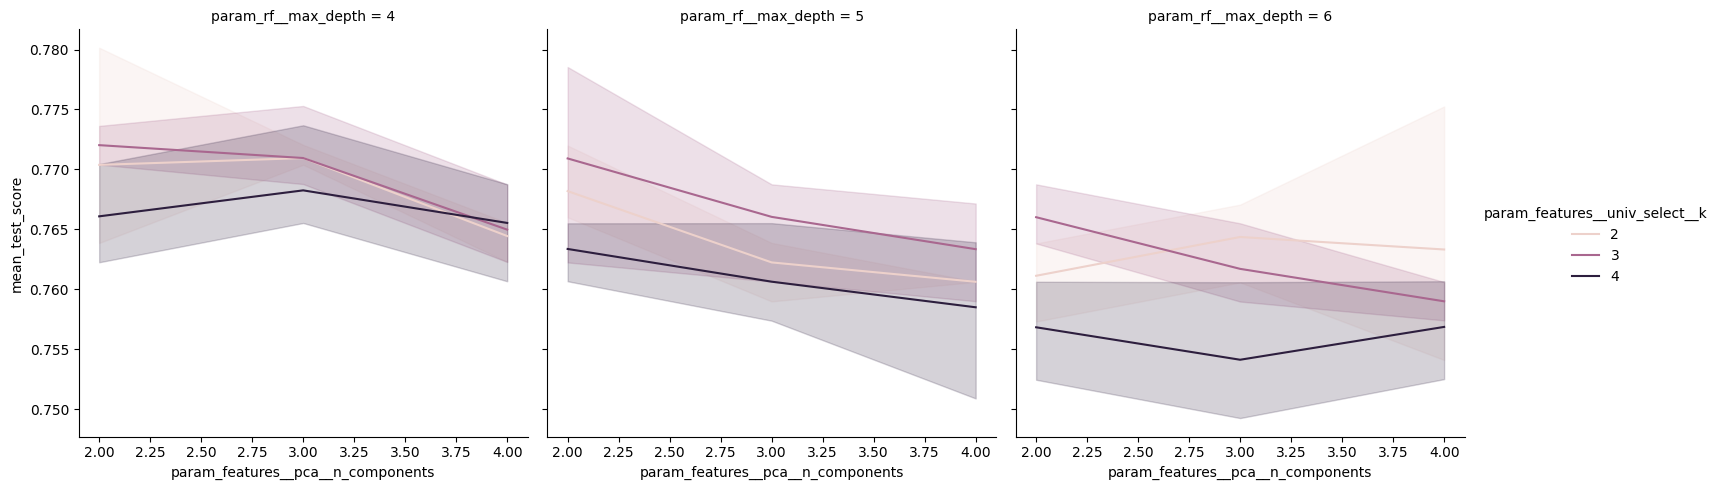

In [40]:
sns.relplot(data=result_df,
	kind='line',
	x='param_features__pca__n_components',
	y='mean_test_score',
	hue='param_features__univ_select__k',
	col='param_rf__max_depth')
plt.show()